# Objetivo

<span style="color: black; font-family: Arial; font-size: 20px;">
Ajudar a empresa a otimizar suas despesas com marketing definindo estratégias de alocação e identificando os canais e períodos mais eficazes para aplicação dos recursos, a fim de maximizar o retorno sobre o investimento.

# Carregando os dados

In [5]:
# Carregando todas as bibliotecas
from scipy import stats as st
import numpy as np
import pandas as pd
from math import factorial
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preparando os dados

### Dataframe Visits

In [8]:
# Carregando o dataframe Visits
visits = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\yafisha-cohorts-analysis\visits_log_us.csv")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [9]:
# Percorrendo os cabeçalhos e convertendo tudo em minúsculos
new_col_names=[]
for old_name in visits.columns:
    name_lowered=old_name.lower()
    new_col_names.append(name_lowered)
visits.columns=new_col_names
print(visits.columns)

Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')


In [10]:
# Renomeando as colunas 'end ts', 'source id' e 'start ts'
columns_new = {'end ts': 'end_ts', 'source id': 'source_id', 'start ts': 'start_ts'  }
visits.rename(columns=columns_new, inplace=True)
print(visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [11]:
# Transformando as colunas "end_ts" e "start_ts" em 'DATETIME'
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

In [12]:
# Verificando e tratando valores ausentes
print(visits.isna().sum())

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64


In [13]:
# Verificando e tratando valores duplicados
print(visits.duplicated().sum())

0


### Dataframe Orders

In [15]:
# Carregando o dataframe Orders
orders = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\yafisha-cohorts-analysis\orders_log_us.csv")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [16]:
# Percorrendo os cabeçalhos e convertendo tudo em minúsculos
new_col_names=[]
for old_name in orders.columns:
    name_lowered=old_name.lower()
    new_col_names.append(name_lowered)
orders.columns=new_col_names
print(orders.columns)

Index(['buy ts', 'revenue', 'uid'], dtype='object')


In [17]:
# Renomeando a coluna 'buy ts'
columns_new = {'buy ts': 'buy_ts'}
orders.rename(columns=columns_new, inplace=True)
print(orders.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [18]:
# Transformando a coluna "buy_ts" em 'DATETIME'
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [19]:
# Verificando e tratando valores ausentes
print(orders.isna().sum())

buy_ts     0
revenue    0
uid        0
dtype: int64


In [20]:
# Verificando e tratando valores duplicados
print(orders.duplicated().sum())

0


### Dataframe Costs

In [22]:
# Carregando o dataframe Costs
costs = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\yafisha-cohorts-analysis\costs_us.csv")
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [23]:
# Transformando a coluna "dt" em 'DATETIME'
costs['dt'] = pd.to_datetime(costs['dt'])

In [24]:
# Verificando e tratando valores ausentes
print(costs.isna().sum())

source_id    0
dt           0
costs        0
dtype: int64


In [25]:
# Verificando e tratando valores duplicados
print(costs.duplicated().sum())

0


# Análise de dados

<span style="color: red; font-family: Arial; font-size: 20px;">
Produto:

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando quantas pessoas usam o produto a cada dia, semana e mês.

In [29]:
# Transformando as colunas para os tipos necessários
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.to_period('M')
visits['session_week'] = visits['start_ts'].dt.to_period('W')
visits['session_date'] = visits['start_ts'].dt.date

In [30]:
# Calculando o número de usuários ativos diários
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()['uid']
print(int(dau_total))

907


In [31]:
# Calculando o número de usuários ativos semanais
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()['uid']
print(int(wau_total))

5716


In [32]:
# Calculando o número de usuários ativos mensais
mau_total = (visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean())['uid']
print(int(mau_total))

23228


<span style="color: black; font-family: Arial; font-size: 20px;">
907 pessoas usam o produto por dia, 5716 usam o produto por semana, e 23228 usam o produto por ano

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando quantas sessões ocorrem por dia (um usuário pode realizar várias sessões)

In [35]:
# Somando o número de sessões por data
sess_per_user = visits.groupby('session_date').agg({'uid': ['count','nunique']})
sess_per_user.columns = ['n_sessions', 'n_users']
sess_per_user['sess_per_user'] = sess_per_user['n_sessions'] / sess_per_user['n_users']

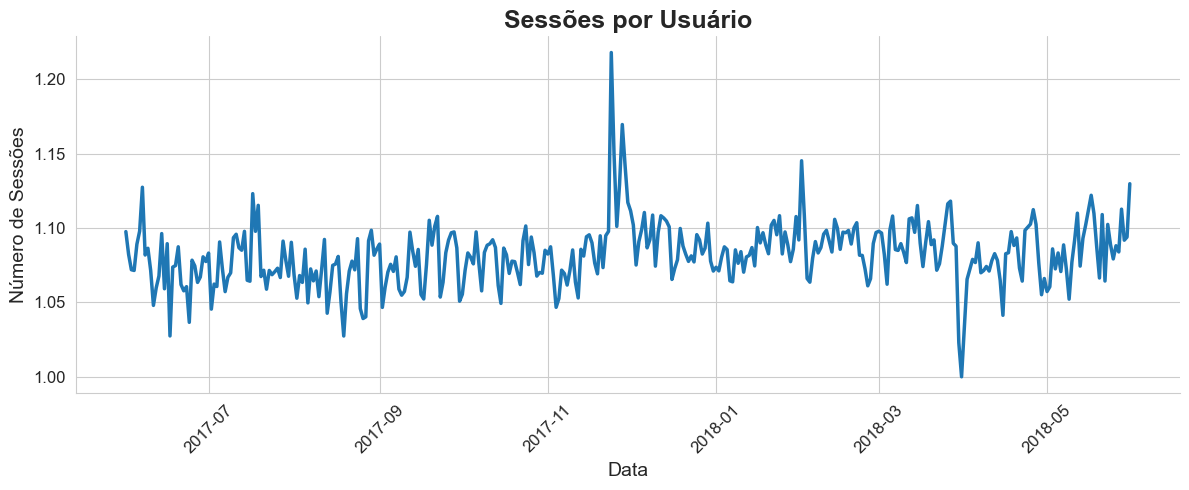

In [36]:
# Plotando um gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
plt.plot(
    sess_per_user.index, 
    sess_per_user['sess_per_user'], 
    color='#1f77b4', 
    linewidth=2.5,  
    markersize=5
)
plt.title('Sessões por Usuário', fontsize=18, fontweight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Número de Sessões', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando o comprimento de cada sessão

In [38]:
visits['session_duration_in_seconds'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(visits['session_duration_in_seconds'].mean())

643.506488592098


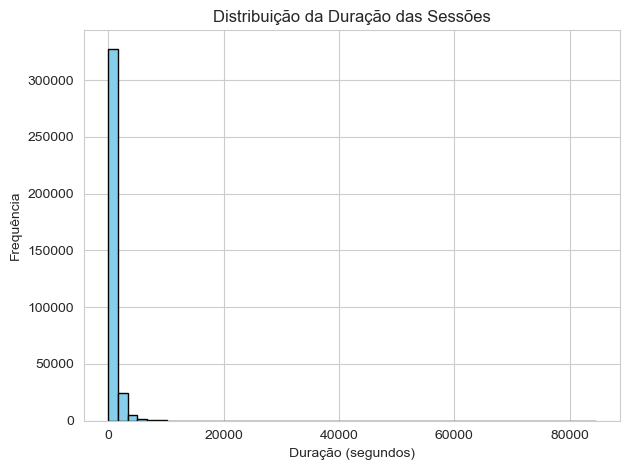

In [39]:
visits['session_duration_in_seconds'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição da Duração das Sessões')
plt.xlabel('Duração (segundos)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Cada sessão tem, em média, 643 segundos

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando a frequência com que os usuários voltam

In [42]:
# Calculando a taxa de retenção semanal e mensal
taxa_de_retenção_semanal = dau_total / wau_total * 100
print(taxa_de_retenção_semanal)
taxa_de_retenção_mensal = dau_total / mau_total * 100
print(taxa_de_retenção_mensal)

15.88440861589881
3.908969652437603


<span style="color: black; font-family: Arial; font-size: 20px;">
A taxa de retenção semanal é de 15,88% e a taxa de retenção mensal é de 3,90%

In [44]:
# Filtrando pelas primeiras visitas por usuário
visits['session_start_ts'] = visits['start_ts']
first_visits = visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits ['first_session_start_ts'].dt.to_period('M')
first_visits.head()

,uid,first_session_start_ts,first_session_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09


In [45]:
# Juntando a tabela das primeiras visitas com o dataframe 'Visits'
visits_full = pd.merge(first_visits, visits, on='uid')
visits_full['age_months'] = ((visits_full['session_month'].dt.year - visits_full['first_session_month'].dt.year) * 12 + (visits_full['session_month'].dt.month - visits_full['first_session_month'].dt.month))
visits_full.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_duration_in_seconds,session_start_ts,age_months
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018,2018-03,2018-02-26/2018-03-04,2018-03-01,360,2018-03-01 17:27:00,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018,2018-02,2018-02-05/2018-02-11,2018-02-06,120,2018-02-06 15:55:00,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017,2017-06,2017-06-05/2017-06-11,2017-06-07,60,2017-06-07 18:47:00,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018,2018-03,2018-03-05/2018-03-11,2018-03-11,360,2018-03-11 17:23:00,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,2017-09,2017-09-18/2017-09-24,2017-09-18,1080,2017-09-18 22:49:00,0


In [46]:
# Montando uma tabela dinâmica
cohort = visits_full.pivot_table(
    index='first_session_month',
    columns='age_months',
    values='uid',
    aggfunc='nunique'
)
cohort.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02,22197.0,1267.0,565.0,446.0,,,,,,,,


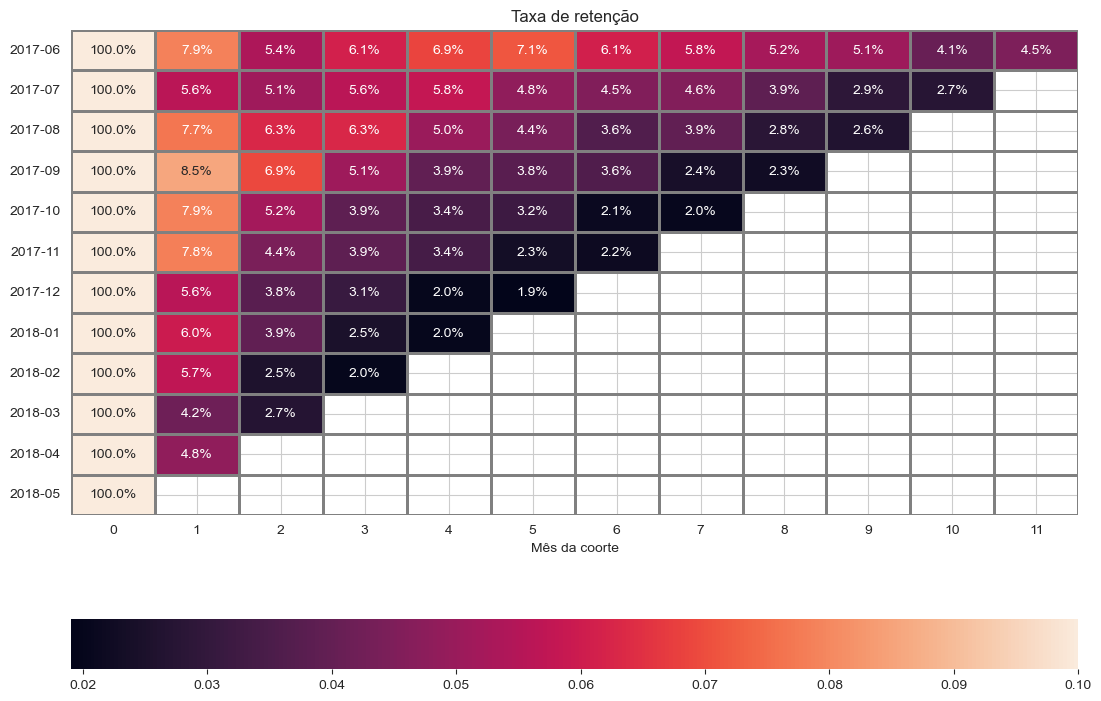

In [47]:
# Dividindo os usuários ativos pelo numero de usuarios no mês de suas primeiras visitas
retentionn = pd.DataFrame()
for column in cohort.columns:
    retentionn = pd.concat([retentionn, cohort[column] / cohort[0]], axis=1)
retentionn.columns = cohort.columns
retentionn.index = [str(x)[0:10] for x in retentionn.index]

# Construindo o Heat Map
plt.figure(figsize = (13,9))
sns.heatmap(retentionn, annot=True, fmt= '.1%', linewidths=1, linecolor='grey', vmax=0.1, cbar_kws = {'orientation': 'horizontal'}).set(title='Taxa de retenção')
plt.xlabel('Mês da coorte')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
É possivel analisar que existe uma taxa alta de rotatividade logo nos primeiros meses, e a retenção a longo prazo é baixa. 

<span style="color: red; font-family: Arial; font-size: 20px;">
Vendas:

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando quando as pessoas começam a comprar

In [51]:
# Adicionando mês
orders['order_month'] = orders['buy_ts'].dt.to_period('M')

# Encontrando os primeiros pedidos
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].dt.to_period('M')

# Criando um datafram com as primeiras ordens e as primeiras visitas
buyers = pd.merge(first_visits, first_orders, on='uid')
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,2018-01-03 21:51:00,2018-01-03,2018-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06,2017-06-03 10:13:00,2017-06-03,2017-06
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10,2017-10-11 18:33:00,2017-10-11,2017-10
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01,2018-01-28 15:54:00,2018-01-28,2018-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11,2017-11-24 10:14:00,2017-11-24,2017-11


In [52]:
buyers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uid                     36523 non-null  uint64        
 1   first_session_start_ts  36523 non-null  datetime64[ns]
 2   first_session_dt        36523 non-null  object        
 3   first_session_month     36523 non-null  period[M]     
 4   first_order_ts          36523 non-null  datetime64[ns]
 5   first_order_dt          36523 non-null  object        
 6   first_order_month       36523 non-null  period[M]     
dtypes: datetime64[ns](2), object(2), period[M](2), uint64(1)
memory usage: 2.0+ MB


In [53]:
# Adicionando a coluna 'days_to_first_purchase'
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) / np.timedelta64(1, 'D')).astype(int)
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,2018-01-03 21:51:00,2018-01-03,2018-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06,2017-06-03 10:13:00,2017-06-03,2017-06,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10,2017-10-11 18:33:00,2017-10-11,2017-10,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01,2018-01-28 15:54:00,2018-01-28,2018-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11,2017-11-24 10:14:00,2017-11-24,2017-11,0


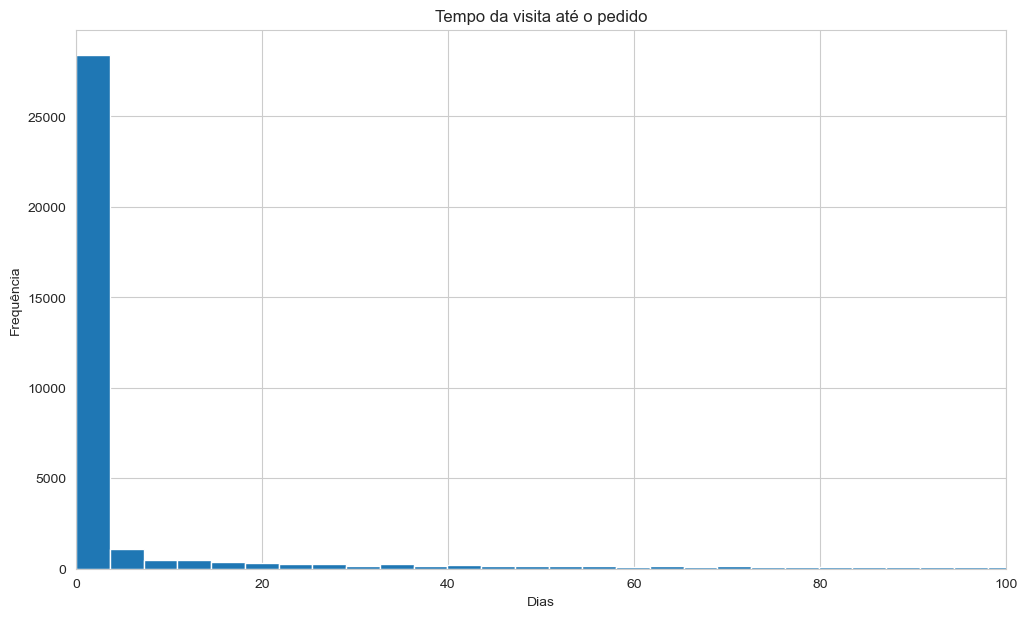

In [54]:
# Fazendo um gráfico
(buyers['days_to_first_purchase'].plot(kind='hist', bins=100, figsize=(12,7)).set(title = 'Tempo da visita até o pedido', xlabel='Dias', ylabel = 'Frequência'))
plt.xlim(0,100)
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
As pessoas começam a comprar em torno de 16 dias, que é o momento em que os usuários iniciam uma sessão até o momento em que fazem um pedido

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando quantos pedidos os clientes fazem durante um determinado período de tempo

In [57]:
# Agregando a receita
cohort_size = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_size.rename(columns={'uid': 'n_buyers'}, inplace=True)

cohortts = pd.merge(orders, buyers, how='inner', on='uid')\
.groupby(['first_order_month', 'order_month'])\
.agg({'revenue': 'count'}).reset_index()

cohortts.head()

,first_order_month,order_month,revenue
0,2017-06,2017-06,2354
1,2017-06,2017-07,177
2,2017-06,2017-08,174
3,2017-06,2017-09,226
4,2017-06,2017-10,292


In [58]:
# Calculando age
cohortts['age_month'] = ((cohortts['order_month'].dt.year - cohortts['first_order_month'].dt.year) * 12 + (cohortts['order_month'].dt.month - cohortts['first_order_month'].dt.month)) 
cohortts.columns = ['first_order_month', 'order_month', 'n_orders', 'age_month']

# Adicionando clientes e calculando o numero de pedidos por usuario
cohortts_report = pd.merge(cohort_size, cohortts, on= 'first_order_month')
cohortts_report['orders_per_buyer'] = cohortts_report['n_orders'] / cohortts_report['n_buyers']
cohortts_report.head()

,first_order_month,n_buyers,order_month,n_orders,age_month,orders_per_buyer
0,2017-06,2023,2017-06,2354,0,1.163618
1,2017-06,2023,2017-07,177,1,0.087494
2,2017-06,2023,2017-08,174,2,0.086011
3,2017-06,2023,2017-09,226,3,0.111715
4,2017-06,2023,2017-10,292,4,0.144340


In [59]:
# Fazendo uma tabela dinâmica
cohortts_ltv = cohortts_report.pivot_table(
    index='first_order_month',
    columns='age_month',
    values='orders_per_buyer',
    aggfunc='sum'
).cumsum(axis=1)

cohortts_ltv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02,1.12,1.18,1.21,1.22,,,,,,,,


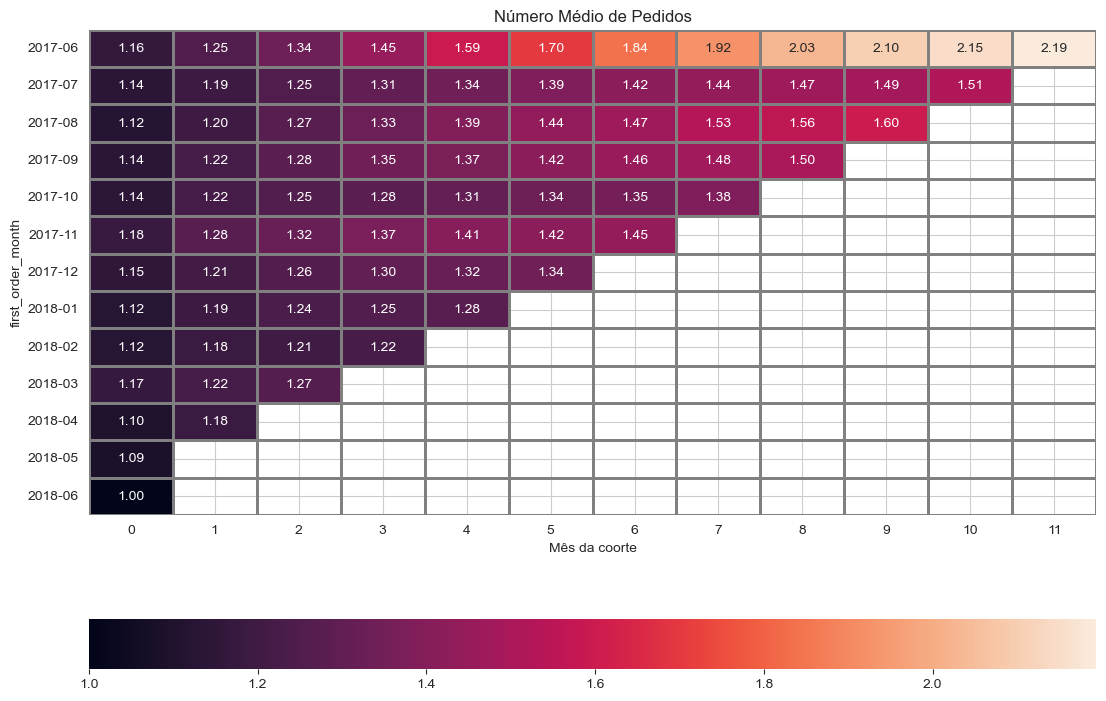

In [60]:
# Construindo o Heat Map
cohortts_ltv.index=cohortts_ltv.index.astype(str)
plt.figure(figsize = (13,9))
sns.heatmap(cohortts_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title='Número Médio de Pedidos')
plt.xlabel('Mês da coorte')
plt.show()

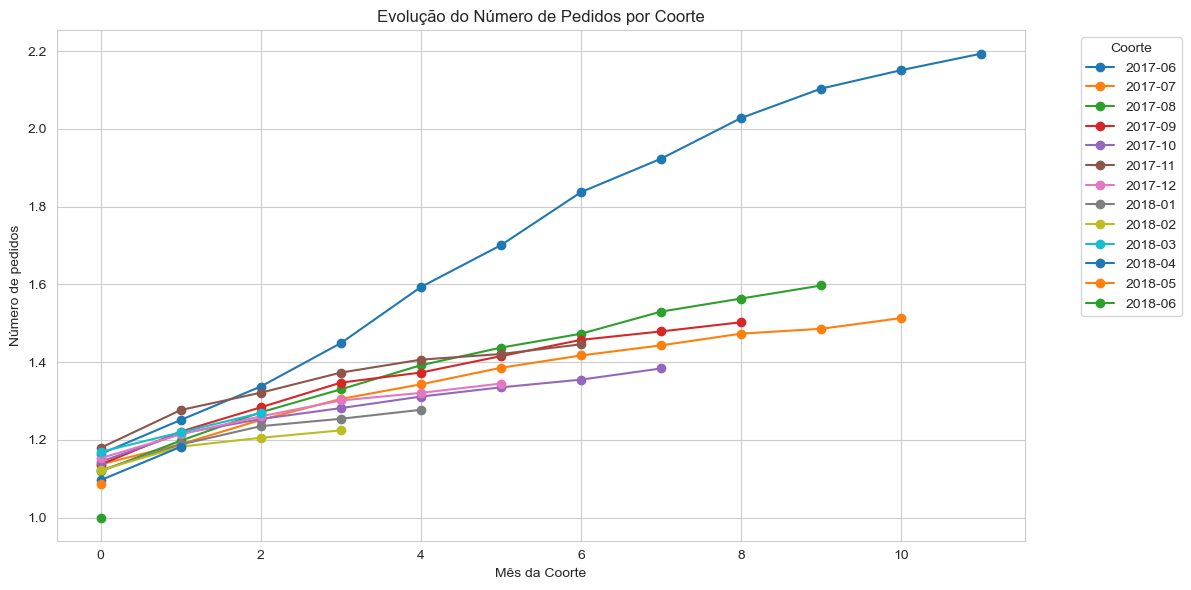

In [61]:
# Plotando gráfico de linhas
plt.figure(figsize=(12, 6))

for coorte in cohortts_ltv.index:
    plt.plot(cohortts_ltv.columns, cohortts_ltv.loc[coorte], marker='o', label=str(coorte))

plt.title("Evolução do Número de Pedidos por Coorte")
plt.xlabel("Mês da Coorte")
plt.ylabel("Número de pedidos")
plt.legend(title="Coorte", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
print("Número médio de pedidos em todo o período:",round(cohortts_ltv.mean().mean(),2))

Número médio de pedidos em todo o período: 1.52


<span style="color: black; font-family: Arial; font-size: 20px;">
Cada cliente fez em média 1 pedido durante o período de tempo analisado.

Quanto mais tempo passa, mais os clientes tendem a fazer mais pedidos

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando o volume médio de uma compra

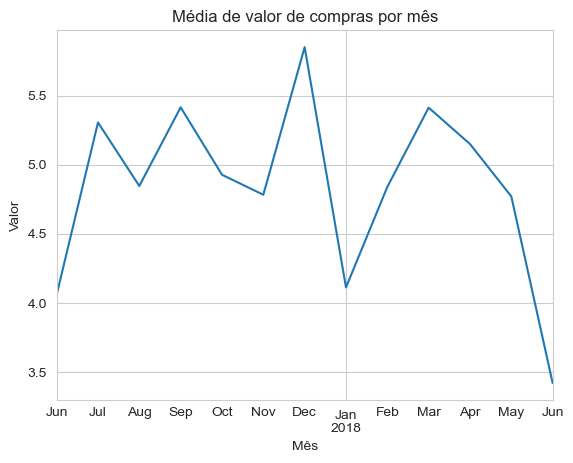

In [65]:
# Plotando um gráfico
orders.pivot_table(index='order_month', values='revenue', aggfunc='mean').plot(legend=None).set(title='Média de valor de compras por mês', xlabel='Mês', ylabel= 'Valor')
plt.show()

In [66]:
print('Valor médio de uma compra:', round(orders['revenue'].mean(),2))

Valor médio de uma compra: 5.0


<span style="color: black; font-family: Arial; font-size: 20px;">
O volume médio de uma compra é de 5

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando o LTV

In [69]:
# Adicionando a quantidade de clientes para cada mês
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [70]:
# Criando o coorte e somando a receita
cohort1 = pd.merge(orders, buyers, how='inner', on='uid').groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index() 
cohort1['age_month'] = ((cohort1['order_month'].dt.year - cohort1['first_order_month'].dt.year) * 12 + (cohort1['order_month'].dt.month - cohort1['first_order_month'].dt.month))
cohort1.head()

,first_order_month,order_month,revenue,age_month
0,2017-06,2017-06,9557.49,0
1,2017-06,2017-07,981.82,1
2,2017-06,2017-08,885.34,2
3,2017-06,2017-09,1931.30,3
4,2017-06,2017-10,2068.58,4


In [71]:
# Adicionando a coluna 'LTV'
cohort_report = pd.merge(cohort_sizes, cohort1, on='first_order_month')
cohort_report['ltv'] = cohort_report['revenue'] / cohort_report['n_buyers']
cohort_report.head()

,first_order_month,n_buyers,order_month,revenue,age_month,ltv
0,2017-06,2023,2017-06,9557.49,0,4.724414
1,2017-06,2023,2017-07,981.82,1,0.485329
2,2017-06,2023,2017-08,885.34,2,0.437637
3,2017-06,2023,2017-09,1931.30,3,0.954671
4,2017-06,2023,2017-10,2068.58,4,1.022531


In [72]:
# Visualizando o coorte em uma tabela dinâmica
cohort_ltv = cohort_report.pivot_table(index='first_order_month', columns = 'age_month', values='ltv', aggfunc= 'sum').cumsum(axis=1)
cohort_ltv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02,4.16,4.44,4.51,4.59,,,,,,,,


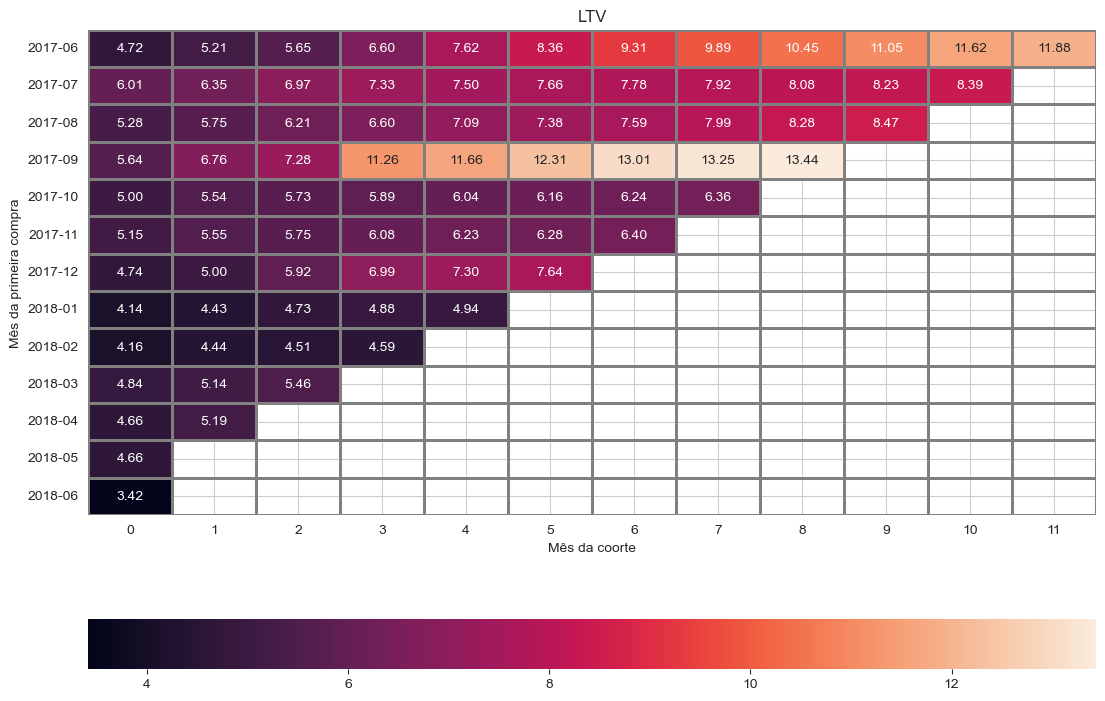

In [73]:
# Criando um Heat Map
cohort_ltv.index=cohort_ltv.index.astype(str)
plt.figure(figsize = (13,9))
sns.heatmap(cohort_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title='LTV')
plt.xlabel('Mês da coorte')
plt.ylabel('Mês da primeira compra')
plt.show()

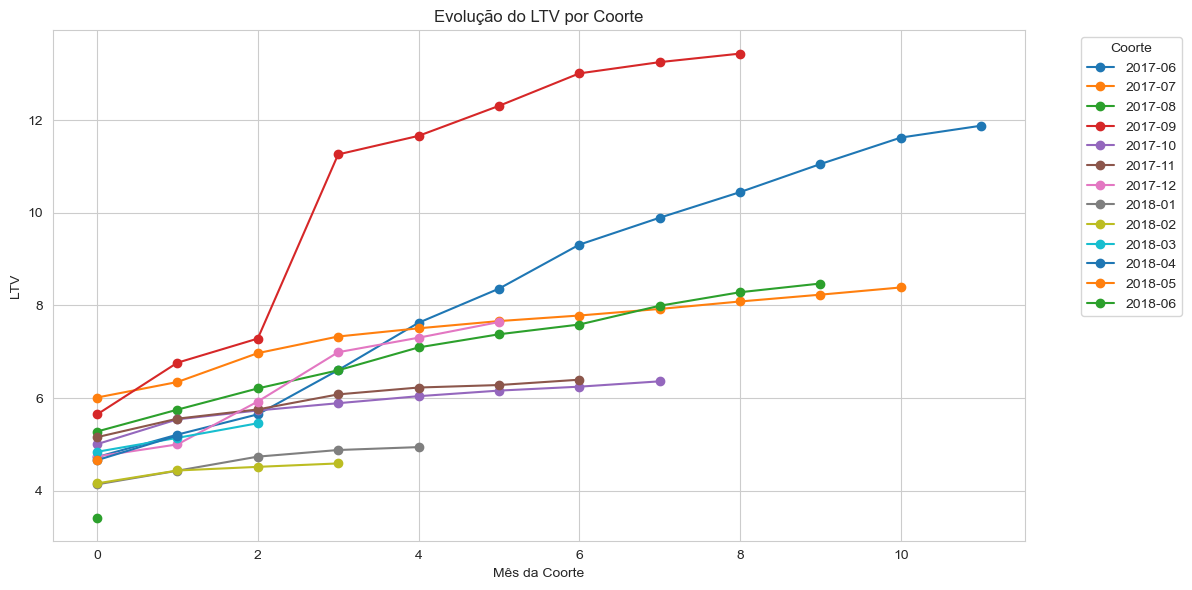

In [74]:
# Plotando gráfico de linhas
plt.figure(figsize=(12, 6))

for coorte in cohort_ltv.index:
    plt.plot(cohort_ltv.columns, cohort_ltv.loc[coorte], marker='o', label=str(coorte))

plt.title("Evolução do LTV por Coorte")
plt.xlabel("Mês da Coorte")
plt.ylabel("LTV")
plt.legend(title="Coorte", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
print('LTV Médio de 6 meses:', round(cohort_ltv[5].mean(),2))

LTV Médio de 6 meses: 7.97


In [76]:
print('LTV Médio:', (cohort_ltv.mean().mean()))

LTV Médio: 8.053762588882604


<span style="color: black; font-family: Arial; font-size: 20px;">

O LTV médio para todo o período é de 8.05

Em praticamente todas as coortes, o LTV aumenta conforme avançam os meses, o que indica que os clientes continuam comprando e gerando receita com o tempo.

A coorte de setembro/2017 é destaque absoluto, atingindo o maior LTV registrado (13,44) no mês 8.

<span style="color: red; font-family: Arial; font-size: 20px;">
Marketing:

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando quanto dinheiro foi gasto em marketing no total, por origem e ao longo do tempo

In [80]:
# Adicionando a coluna do mês do custo de marketing
costs['cost_month'] = costs['dt'].dt.to_period('M')
costs.head()

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [81]:
print(costs['costs'].sum())

329131.62


<span style="color: black; font-family: Arial; font-size: 20px;">
No total foram gastos $329.131,62 com marketing

In [83]:
# Calculando as despesas mensais
monthly_costs = costs.groupby('cost_month')['costs'].sum()
monthly_costs

cost_month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64

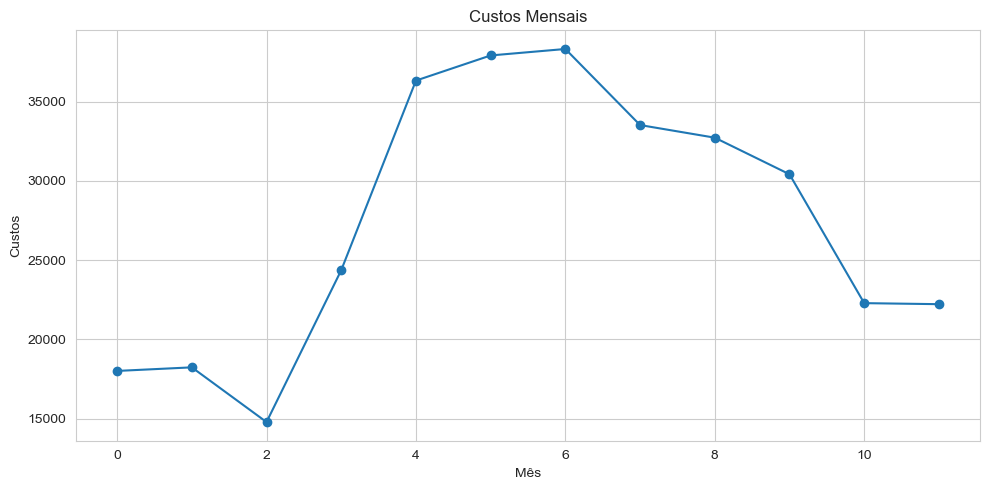

In [84]:
# Plotando um gráfico
plt.figure(figsize=(10, 5))
plt.plot(monthly_costs.values, marker='o')
plt.title('Custos Mensais')
plt.xlabel('Mês')
plt.ylabel('Custos')
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Os maiores gastos com marketing foram do mês 4 ao mes 6 do coorte.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando o custo total por Souce ID por mês

In [87]:
# Agrupando os custos dos Source ID por mês
source_costs = costs.groupby('source_id')['costs'].sum()
source_costs

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [88]:
# Criando uma tabela dinâmica
analysis_source = costs.pivot_table(index='cost_month', columns='source_id', values='costs', aggfunc='sum')
analysis_source

source_id,1,2,3,4,5,9,10
cost_month,,,,,,,
2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


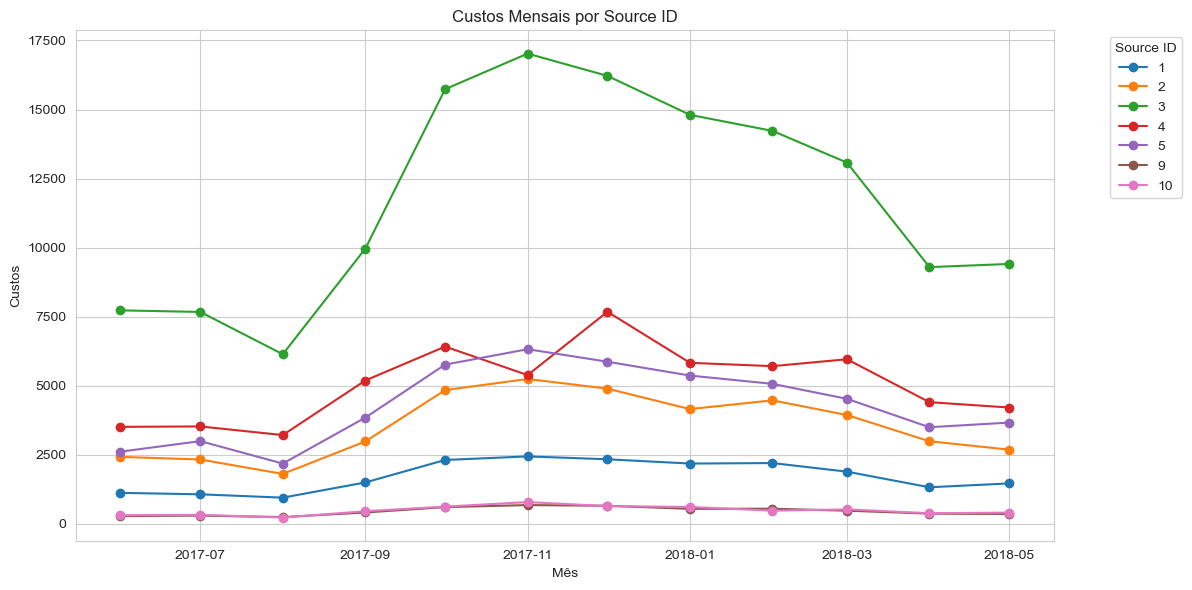

In [89]:
# Plotando um gráfico
analysis_source.index = analysis_source.index.to_timestamp()
plt.figure(figsize=(12, 6))

for source in analysis_source.columns:
    plt.plot(analysis_source.index, analysis_source[source], marker='o', label=str(source))

plt.title('Custos Mensais por Source ID')
plt.xlabel('Mês')
plt.ylabel('Custos')
plt.legend(title='Source ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

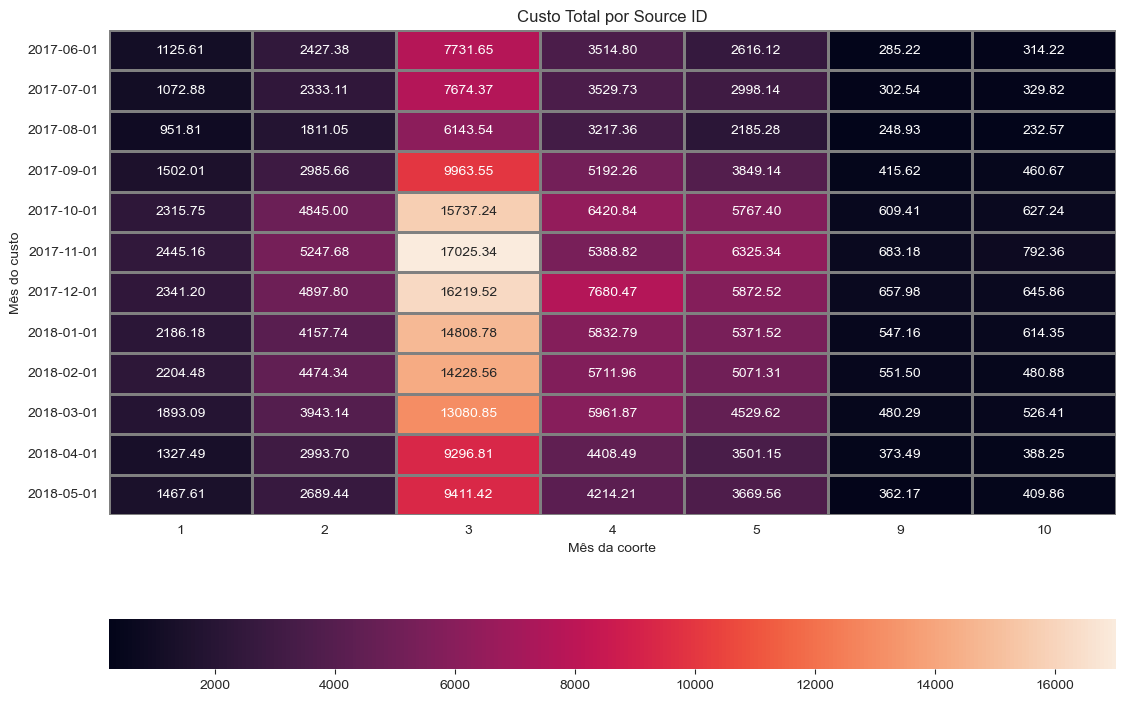

In [90]:
# Plotando um Heat Map
analysis_source.index=analysis_source.index.astype(str)
plt.figure(figsize = (13,9))
sns.heatmap(analysis_source, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title='Custo Total por Source ID')
plt.xlabel('Mês da coorte')
plt.ylabel('Mês do custo')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">

O custo do ID 3 foi o maior de todos (com destaque para os meses de 10/2017 até o mês 03/2018)

O custo do ID 10 foi o menor

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando quanto custou a aquisição de clientes (CAC) para cada Source ID

In [93]:
# Agregando os compradores
agg_buyers = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
agg_buyers.head()

,first_order_month,uid
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [94]:
monthly_costs = costs.groupby('cost_month')['costs'].sum().reset_index()
monthly_costs

,cost_month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


In [95]:
# Adicionando os dados das despesas ao relatório e calculando o CAC
report_ = pd.merge(agg_buyers, monthly_costs, left_index=True, right_index=True)
report_['cac'] = report_['costs'] / report_['uid']
report_.head()

,first_order_month,uid,cost_month,costs,cac
0,2017-06,2023,2017-06,18015.00,8.905091
1,2017-07,1923,2017-07,18240.59,9.485486
2,2017-08,1370,2017-08,14790.54,10.796015
3,2017-09,2581,2017-09,24368.91,9.441654
4,2017-10,4340,2017-10,36322.88,8.369327


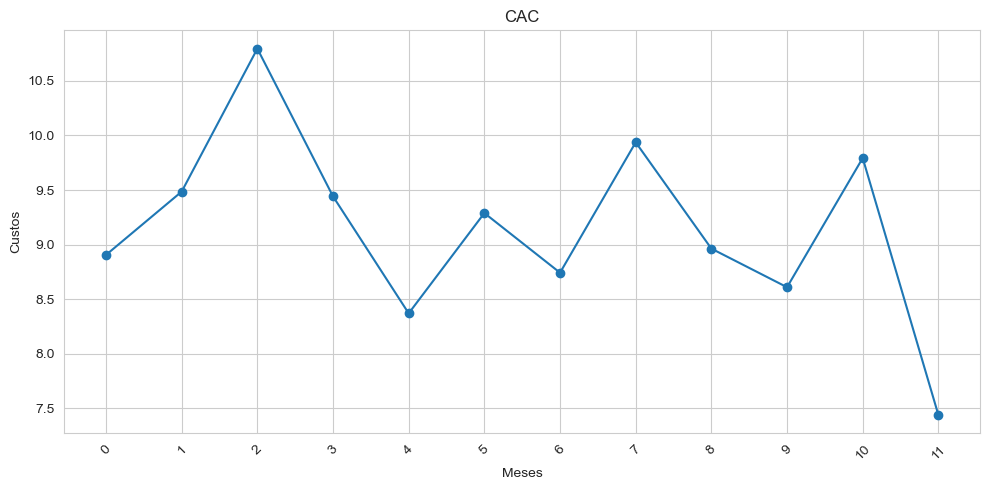

In [96]:
# Plotando um gráfico de linhas
plt.figure(figsize=(10, 5))
plt.plot(report_.index, report_['cac'].values, marker='o')
plt.title('CAC')
plt.xlabel('Meses')
plt.ylabel('Custos')
plt.xticks(ticks= report_.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
print(report_['cac'].mean())

9.147357292482544


<span style="color: black; font-family: Arial; font-size: 20px;">
A aquisição de cada cliente custou para a empresa uma média de $9,14

In [99]:
# Agregando cada cliente pelo Source ID
users = visits_full.sort_values('session_start_ts').groupby('uid').first()
users = users[['source_id']]
users.head()

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


In [100]:
# Adicionando o Source ID na tabela buyers
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,2018-01-03 21:51:00,2018-01-03,2018-01,106,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06,2017-06-03 10:13:00,2017-06-03,2017-06,0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10,2017-10-11 18:33:00,2017-10-11,2017-10,0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01,2018-01-28 15:54:00,2018-01-28,2018-01,0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11,2017-11-24 10:14:00,2017-11-24,2017-11,0,5


In [101]:
# Agrupando o numero de compradores por source ID e primeiro pedido
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily.head()

,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [102]:
# Adicionando o CAC
costs_cac = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_cac['cac'] = costs_cac['costs'] / costs_cac['n_buyers']
costs_cac.head()

,source_id,first_order_dt,n_buyers,dt,costs,cost_month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06,3.171111


In [103]:
# Criando a tabela dinâmica da aquisição de clientes por Source ID
analysis_cac = costs_cac.pivot_table(index='cost_month', columns='source_id', values='cac', aggfunc='mean')
analysis_cac

source_id,1,2,3,4,5,9,10
cost_month,,,,,,,
2017-06,11.681283,12.883568,16.716919,10.792094,9.209676,5.253654,4.590158
2017-07,9.491485,18.000253,18.593952,8.054482,7.938157,5.582433,6.151880
2017-08,12.118898,18.886449,19.795068,11.554926,6.879620,4.900254,5.813398
2017-09,8.155731,17.672249,13.084043,9.533800,6.864844,6.049126,8.306581
2017-10,8.202083,14.193003,14.613088,6.233562,6.305969,5.923235,6.362921
2017-11,8.908503,17.437690,16.091445,5.013132,9.368019,9.400503,10.801337
2017-12,8.570439,13.871086,12.948321,5.656507,8.399174,7.899420,7.803197
2018-01,11.719181,15.850151,15.134989,5.901092,9.371755,9.792713,9.851557
2018-02,10.752216,18.209325,13.894612,5.428068,7.725369,8.181382,4.489624


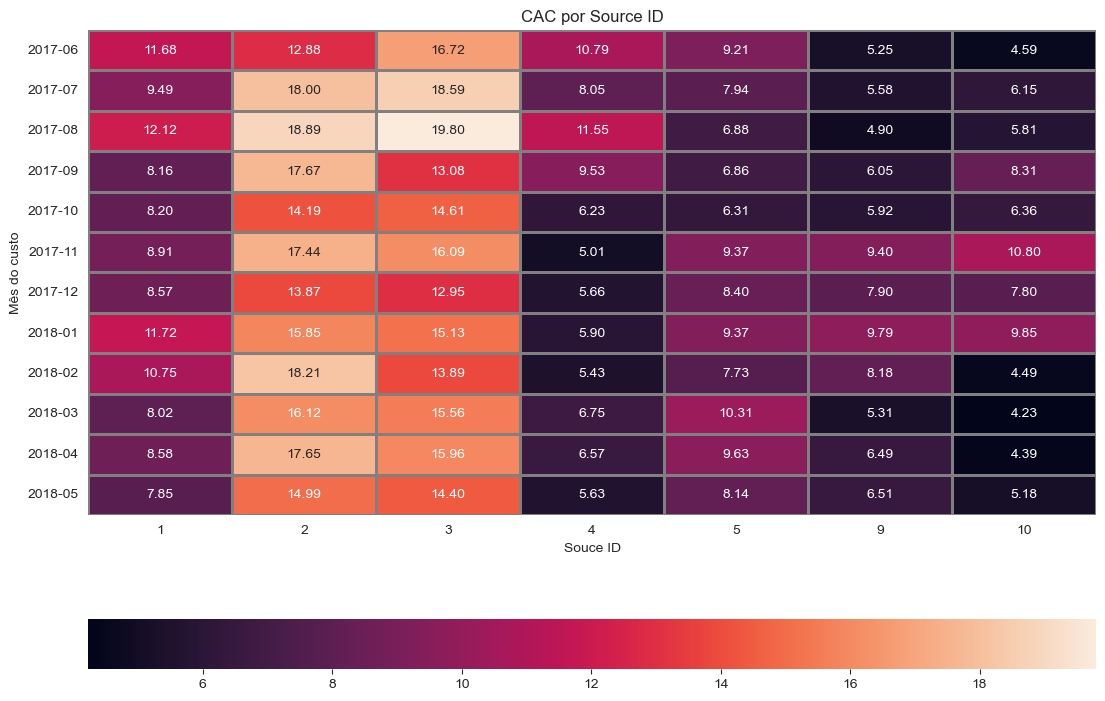

In [104]:
# Fazendo um Heat Map
analysis_cac.index=analysis_cac.index.astype(str)
plt.figure(figsize = (13,9))
sns.heatmap(analysis_cac, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title='CAC por Source ID')
plt.xlabel('Souce ID')
plt.ylabel('Mês do custo')
plt.show()

In [105]:
analysis_cac.mean().round(2)

source_id
1      9.50
2     16.31
3     15.57
4      7.26
5      8.35
9      6.77
10     6.50
dtype: float64

<span style="color: black; font-family: Arial; font-size: 20px;">

Os ID's 2 e 3 têm CACs consistentemente altos, sugerindo canais mais caros.

Destaca-se o ID 3 em agosto/2017 que teve um CAC bem alto.

O ID 10 e 9 são os mais econômicos na maioria dos meses.

ID's com CAC mais alto podem ter menos prioridade, a não ser que entreguem clientes de maior valor ao longo do tempo (LTV)

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando o ROMI

In [108]:
cohort_report.head()

,first_order_month,n_buyers,order_month,revenue,age_month,ltv
0,2017-06,2023,2017-06,9557.49,0,4.724414
1,2017-06,2023,2017-07,981.82,1,0.485329
2,2017-06,2023,2017-08,885.34,2,0.437637
3,2017-06,2023,2017-09,1931.30,3,0.954671
4,2017-06,2023,2017-10,2068.58,4,1.022531


In [109]:
# Calculando os custos por mês
monthly_costs = costs.groupby('cost_month')['costs'].sum().reset_index()
monthly_costs

,cost_month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


In [110]:
report_romi = pd.merge(cohort_report, monthly_costs, left_on='first_order_month', right_on='cost_month' )
report_romi.head()

,first_order_month,n_buyers,order_month,revenue,age_month,ltv,cost_month,costs
0,2017-06,2023,2017-06,9557.49,0,4.724414,2017-06,18015.0
1,2017-06,2023,2017-07,981.82,1,0.485329,2017-06,18015.0
2,2017-06,2023,2017-08,885.34,2,0.437637,2017-06,18015.0
3,2017-06,2023,2017-09,1931.30,3,0.954671,2017-06,18015.0
4,2017-06,2023,2017-10,2068.58,4,1.022531,2017-06,18015.0


In [111]:
# Criando as colunas do CAC e ROMI, e criando uma tabela dinâmica
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
romi = report_romi.pivot_table(
    index='first_order_month', columns='age_month', values='romi', aggfunc='mean'
)

romi = romi.cumsum(axis=1).round(2)
romi.fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02,0.46,0.49,0.5,0.51,,,,,,,,


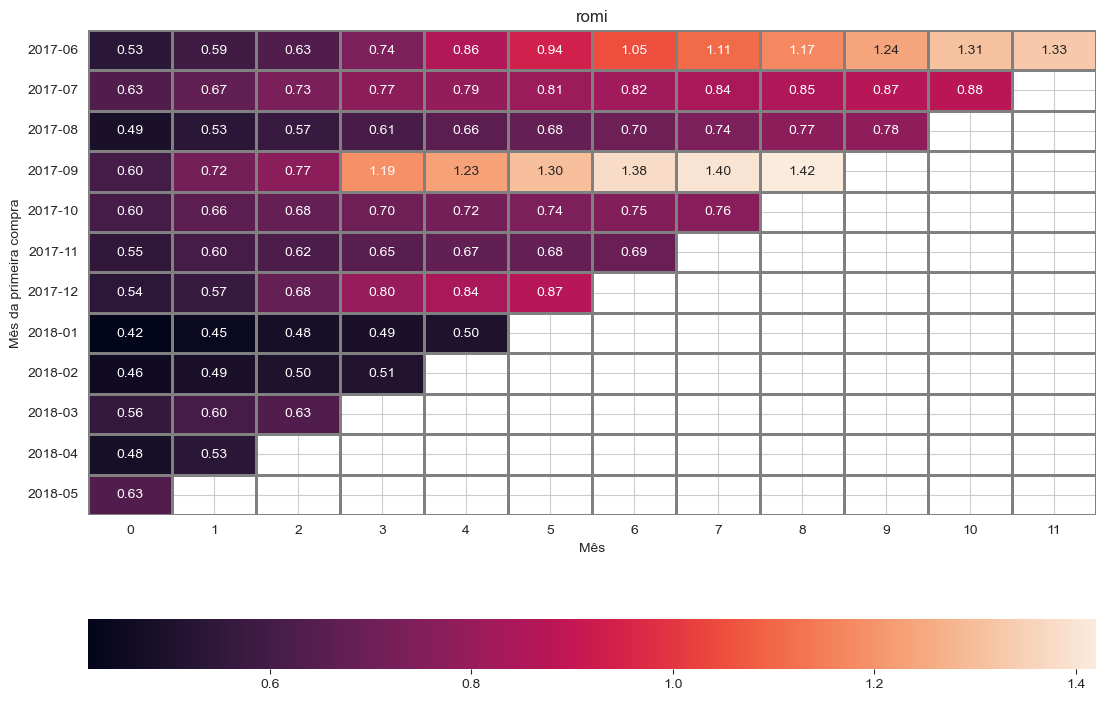

In [112]:
# Fazendo um Heat Map
romi.index=romi.index.astype(str)
plt.figure(figsize = (13,9))
sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title='romi')
plt.xlabel('Mês')
plt.ylabel('Mês da primeira compra')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">

Destaca-se a coorte de setembro/2017 que teve um ótimo retorno.

Coortes como em setembro/2017 e outubro/2017 parecem ter um retorno mais alto e rápido.

Coortes como janeiro/2018 teve um ROMI mais baixo, indicando que talvez a campanha de marketing daquele mês foi menos eficaz ou o comportamento dos clientes mudou.

<span style="color: blue; font-family: Arial; font-size: 20px;">

Calculando o ROI

In [115]:
# Encontrando o mês da primeira compra de cada usuário
first_orders_df = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_df.columns = ['uid', 'first_purchase']
first_orders_df.head()

,uid,first_purchase
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


In [116]:
# Associando cada usuário à sua fonte de aquisição
user_source = visits[['uid', 'source_id']].drop_duplicates()
first_orders_df = pd.merge(first_orders_df, user_source, on= 'uid')
first_orders_df.head()

,uid,first_purchase,source_id
0,313578113262317,2018-01,2
1,1575281904278712,2017-06,10
2,2429014661409475,2017-10,3
3,2464366381792757,2018-01,5
4,2551852515556206,2017-11,5


In [117]:
# Calculando a receita por usuário por mês e ligando a receita ao mês e à fonte do usuário
revenue_df = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyers_number = first_orders_df.merge(revenue_df, on='uid')
buyers_number.head()

,uid,first_purchase,source_id,order_month,revenue
0,313578113262317,2018-01,2,2018-01,0.55
1,1575281904278712,2017-06,10,2017-06,3.05
2,2429014661409475,2017-10,3,2017-10,73.33
3,2464366381792757,2018-01,5,2018-01,2.44
4,2551852515556206,2017-11,5,2017-11,10.99


In [118]:
# Calculando a receita total e os custos totais por fonte e mês
revenue_grouped_df = buyers_number.groupby(['source_id', 'order_month']).agg({'revenue': 'sum'}).reset_index()
costs_grouped_df = costs.groupby(['source_id','cost_month']).agg({'costs': 'sum'}).reset_index()
costs_grouped_df.columns = ['source_id', 'month', 'costs']

revenue_grouped_df.columns = ['source_id', 'month', 'revenue']
revenue_grouped_df.head()

,source_id,month,revenue
0,1,2017-06,2563.84
1,1,2017-07,3947.25
2,1,2017-08,3325.64
3,1,2017-09,8193.42
4,1,2017-10,11466.14


In [119]:
# Criando tabela final com custos e receita
reportt = pd.merge(
    costs_grouped_df,
    revenue_grouped_df,
    left_on=['source_id', 'month'],
    right_on=['source_id', 'month']
)
reportt.head()

,source_id,month,costs,revenue
0,1,2017-06,1125.61,2563.84
1,1,2017-07,1072.88,3947.25
2,1,2017-08,951.81,3325.64
3,1,2017-09,1502.01,8193.42
4,1,2017-10,2315.75,11466.14


In [120]:
# Calculando o ROI
total_costs = reportt['costs'].sum()
total_revenue = reportt['revenue'].sum()
ROI = (total_revenue - total_costs) / total_costs * 100
print(ROI)

80.1122815243336


<span style="color: black; font-family: Arial; font-size: 20px;">
O ROI atual é de aproximandamente 80%

# Conclusões e recomendações

<span style="color: black; font-family: Arial; font-size: 20px;">

A análise dos dados revelou pontos-chave sobre retenção, LTV e eficiência dos canais de marketing:

---

🔹 Retenção e Comportamento do Cliente
- **Alta rotatividade inicial**: queda acentuada na retenção nos primeiros meses.
- **Retenção de longo prazo baixa**, embora clientes que permanecem tendam a realizar mais pedidos com o tempo.
- Tempo médio até a primeira compra: **~16 dias** após a primeira sessão.

---

 🔹 LTV (Lifetime Value)
- **LTV médio**: 8,05 para todo o período.
- Crescimento consistente do LTV ao longo dos meses em praticamente todas as coortes.
- **Destaque**: coorte de **setembro/2017** com o maior LTV registrado (13,44 no mês 8).

---

 🔹 Gastos e Eficiência de Marketing
- Total investido: **$329.131,62**.
- Picos de investimento entre **mês 4 e mês 6** das coortes.
- **Source ID 3**: maior custo, com CAC elevado entre 10/2017 e 03/2018.
- **Sources ID 9 e 10**: canais mais econômicos na maioria dos meses.
- Canais com CAC alto (IDs 2 e 3) devem ser priorizados apenas se gerarem LTV superior à média.

---

 🔹 ROI e ROMI
- ROI atual: **~80%**, significando que o retorno obtido foi 80% acima do valor investido.
- Este valor indica que o investimento em marketing tem sido **lucrativo**, mas ainda há espaço para otimização, já que existem canais e coortes com ROI superior a 100%.
- Coortes de setembro e outubro/2017 apresentaram **retorno rápido e elevado**.
- Coorte de janeiro/2018 teve ROMI mais baixo, possivelmente devido a menor eficácia da campanha ou mudança no comportamento dos clientes.

---

 📌 Recomendação
- Reduzir investimento em canais com **alto CAC e baixo retorno**.
- Priorizar **canais mais econômicos** com bom desempenho histórico (IDs 9 e 10).
- Concentrar esforços nos períodos e coortes que apresentam **maior LTV e ROMI positivo**.
- Buscar replicar estratégias bem-sucedidas de coortes com ROI acima da média para aumentar a lucratividade geral.